# Data Preparation (for modeling with TensorFlow)

In [ ]:
numerical = [
            'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 
             'latitude','longitude', 'accommodates', 'bathroom_qty', 'bedrooms', 'beds',
            ]
categorical = [
                'host_response_time','host_is_superhost', 
                'host_verifications_work_email','host_has_profile_pic',
                'neighbourhood_cleansed', 'room_type', 'property_description', 'bathroom_type', 
                'gym','pool','kitchen','parking','washer','dryer','conditioning','heating','workspace',
                'tv','hair dryer','iron','hot tub','crib','bbq','fireplace','smoking', 'coffee maker', 
               'instant_bookable',
              ]
label=['log_price']

## 1. Reading Needed Data

In [ ]:
import os

import json
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

tf.random.set_seed(42)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_pickle("../data/listings_cleaned.pkl")
data.loc[:,"log_price"] = np.log(data.loc[:,"price"])
data = data[numerical + categorical + label]
data.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathroom_qty,bedrooms,beds,host_response_time,...,hair dryer,iron,hot tub,crib,bbq,fireplace,smoking,coffee maker,instant_bookable,log_price
1,1.0,0.83,7,19.43542,-99.13802,2,1.5,1.0,2.0,within_a_day,...,1,1,1,0,0,0,0,1,False,8.162231
2,1.0,0.83,7,19.43423,-99.13718,4,2.5,2.0,4.0,within_a_day,...,1,1,0,0,0,0,0,1,False,8.612322
3,1.0,0.98,10,19.43826,-99.13660,4,1.0,2.0,2.0,within_an_hour,...,1,1,0,0,0,0,1,1,True,6.754604
5,1.0,0.82,17,19.41162,-99.17794,14,5.5,5.0,8.0,within_an_hour,...,1,1,0,0,0,0,0,1,False,9.798127
6,1.0,1.00,2,19.41936,-99.17281,3,1.0,1.0,1.0,within_an_hour,...,1,1,0,1,0,0,1,1,True,8.103797


In [ ]:
data.dtypes

host_response_rate               float64
host_acceptance_rate             float64
host_total_listings_count          int64
latitude                         float64
longitude                        float64
accommodates                       int64
bathroom_qty                     float64
bedrooms                         float64
beds                             float64
host_response_time                object
host_is_superhost                   bool
host_verifications_work_email      int64
host_has_profile_pic                bool
neighbourhood_cleansed            object
room_type                         object
property_description              object
bathroom_type                     object
gym                                int64
pool                               int64
kitchen                            int64
parking                            int64
washer                             int64
dryer                              int64
conditioning                       int64
heating         

## 2. Dummy Variables (Categorical Data)

In [ ]:
data = pd.get_dummies(data, columns=categorical, drop_first=True)
data.columns

Index(['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathroom_qty', 'bedrooms', 'beds', 'log_price',
       'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour', 'host_is_superhost_True',
       'host_verifications_work_email_1', 'host_has_profile_pic_True',
       'neighbourhood_cleansed_azcapotzalco',
       'neighbourhood_cleansed_benito_juarez',
       'neighbourhood_cleansed_coyoacan',
       'neighbourhood_cleansed_cuajimalpa_de_morelos',
       'neighbourhood_cleansed_cuauhtemoc',
       'neighbourhood_cleansed_gustavo_a._madero',
       'neighbourhood_cleansed_iztacalco', 'neighbourhood_cleansed_iztapalapa',
       'neighbourhood_cleansed_la_magdalena_contreras',
       'neighbourhood_cleansed_miguel_hidalgo',
       'neighbourhood_cleansed_milpa_alta', 'neighbourhood_cleansed_tlahuac',
       'neighbourhood_cleansed_tlalp

In [ ]:
data=data.astype('float32')
data.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathroom_qty,bedrooms,beds,log_price,...,tv_1,hair dryer_1,iron_1,hot tub_1,crib_1,bbq_1,fireplace_1,smoking_1,coffee maker_1,instant_bookable_True
1,1.0,0.83,7.0,19.435419,-99.138023,2.0,1.5,1.0,2.0,8.162231,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.83,7.0,19.434231,-99.137177,4.0,2.5,2.0,4.0,8.612322,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.98,10.0,19.438259,-99.136597,4.0,1.0,2.0,2.0,6.754604,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,1.0,0.82,17.0,19.411619,-99.177940,14.0,5.5,5.0,8.0,9.798127,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,1.00,2.0,19.419359,-99.172813,3.0,1.0,1.0,1.0,8.103797,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


## 3. Splitting Data

In [ ]:
train_size = .8

# Split:
train_dataset = data.sample(frac=train_size, random_state=0)
test_dataset = data.drop(train_dataset_full.index)

In [ ]:
train_dataset_full.shape, test_dataset.shape

((16458, 98), (4115, 98))

In [ ]:
# Split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('log_price')
test_labels = test_features.pop('log_price')

In [ ]:
##############
# Splitting data into training and testing sets
X = data.copy()
X = X.drop('log_price', axis=1)
y = data['log_price']

test_size=0.2
validation_size=0.2

train_size = 1 - test_size
correct_validation_size = validation_size/train_size

# TEST
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
# VALIDATION
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=correct_validation_size, random_state=42)

In [ ]:
X_train_full.shape, X_train.shape, X_test.shape, X_val.shape

((16458, 97), (12343, 97), (4115, 97), (4115, 97))

## 4. Scaling (Numerical Data)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [ ]:
print(normalizer.mean.numpy())

[[ 9.68411715e-01  9.46432741e-01  3.27687447e+01  1.94058976e+01
  -9.91667816e+01  3.41450966e+00  1.48013124e+00  1.54739336e+00
   2.01834974e+00  5.14643335e-02  1.02199538e-01  8.34244744e-01
   4.44221655e-01  1.43395309e-01  9.88455462e-01  9.84323733e-03
   1.19334062e-01  6.14898530e-02  1.61015919e-02  4.71138656e-01
   1.61623527e-02  1.39749666e-02  9.47867299e-03  3.09879694e-03
   1.77785879e-01  7.29128691e-04  1.64053956e-03  2.77068903e-02
   2.75853688e-02  5.28618301e-03  4.01020780e-03  3.02345364e-01
   1.25167092e-02  0.00000000e+00  1.18483412e-02  7.47356908e-03
   3.03803621e-04  1.33673593e-03  0.00000000e+00  1.16052983e-02
   6.07607243e-05  6.07607243e-05  1.74504800e-01  6.07607243e-04
   2.43042897e-04  0.00000000e+00  1.21521449e-04  1.21521449e-04
   2.09624499e-02  1.56155061e-02  7.89889415e-04  1.09247782e-01
   6.07607243e-05  5.10390084e-03  1.84712602e-02  6.07607243e-05
   6.07607243e-04  6.07607243e-05  6.88419006e-02  2.43042897e-04
   0.00000

In [ ]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[  1.     0.79   6.    19.36 -99.17   2.     1.     1.     1.     0.
    0.     1.     1.     0.     1.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     1.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
    1.     0.     0.     0.     0.     0.     0.     1.     0.     1.
    0.     0.     0.     0.     0.     1.     0.  ]]

Normalized: [[ 0.3  -1.24 -0.26 -1.22 -0.22 -0.61 -0.42 -0.48 -0.55 -0.23 -0.34  0.45
   1.12 -0.41  0.11 -0.1  -0.37 -0.26 -0.13 -0.94 -0.13 -0.12 -0.1  -0.06
  -0.47 -0.03 -0.04 -0.17 -0.17 -0.07 -0.06  1.52 -0.11  0.   -0.11 -0.09
  -0.02 -0.04  0.   -0.11 -0.01 -0.01 -0.46 -0.02 -0.02  0.   -0.01

In [ ]:
###########
scaler = StandardScaler()

# TRAIN
X_train[numerical] = scaler.fit_transform(X_train[numerical])
# VAL
X_val[numerical] = scaler.transform(X_val[numerical])
# TEST
X_test[numerical] = scaler.transform(X_test[numerical])

In [ ]:
X_test[numerical].head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathroom_qty,bedrooms,beds
12476,0.298371,0.422423,-0.261734,0.520720,0.390135,-0.610850,-0.438674,-0.501742,-0.550522
5803,0.298371,0.343962,-0.292253,0.453056,0.219119,-0.610850,0.494789,0.423830,-0.550522
19938,0.110722,0.422423,-0.241388,0.221772,0.016276,-0.610850,0.494789,-0.501742,-0.550522
15233,0.298371,0.422423,-0.282080,-0.145053,0.116027,-0.610850,-0.438674,-0.501742,-0.550522
17679,-0.546048,0.343962,-0.282080,0.761726,-0.413283,0.261147,-0.438674,0.423830,-0.006261


## 5. Feature Cross (Location Data)

We'll be using a feature cross, meaning we will split the longitude*langitude map into equally spreaded grids by iterating from the minimum to the maximum value with an iteration of (max-min)/100 (100x100 grid).

**Docs**: [Introducing TensorFlow Feature Columns](https://developers.googleblog.com/2017/11/introducing-tensorflow-feature-columns.html)

**Example**: 

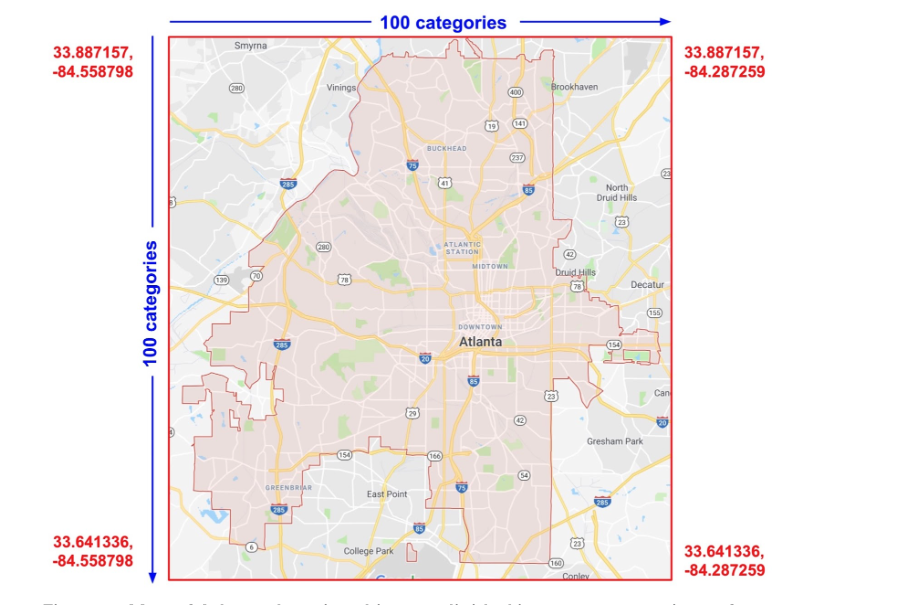

In [ ]:
max_long=train_dataset['longitude'].max()
min_long=train_dataset['longitude'].min()

diff=max_long-min_long
diff/=100

long_boundaries=[]
for i in np.arange(min_long, max_long, diff):
    long_boundaries.append(min_long+i*diff)

    
max_lat=train_dataset['latitude'].max()
min_lat=train_dataset['latitude'].min()

d=max_lat-min_lat
d/=100

lat_boundaries=[]
for i in np.arange(min_lat, max_lat, d):
    lat_boundaries.append(min_long+i*d)

We're defining a bucketized column with boundaries defined earlier and creating a DenseFeatures layer, which will be passed to the Sequential API later.

In [ ]:
long_marked=tf.feature_column.bucketized_column(
tf.feature_column.numeric_column('longitude'), boundaries=long_boundaries
)

lat_marked=tf.feature_column.bucketized_column(
   tf.feature_column.numeric_column('latitude'),boundaries=lat_boundaries
)


crossed_feature=tf.feature_column.crossed_column([long_marked,lat_marked],hash_bucket_size=100)
feature_layer=tf.keras.layers.DenseFeatures(tf.feature_column.indicator_column(crossed_feature))

# Training

In [ ]:
model = tf.keras.Sequential([
  # feature_layer,
    normalizer,
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    # layers.Dropout(0.3),
    layers.Dense(32,activation='relu'),
    layers.Dense(1)

])

opt=tf.keras.optimizers.legacy.Adam(learning_rate=0.05)
rmse=tf.keras.metrics.RootMeanSquaredError()
model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mae',rmse])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 97)                195       
 tion)                                                           
                                                                 
 dense_60 (Dense)            (None, 128)               12544     
                                                                 
 dense_61 (Dense)            (None, 64)                8256      
                                                                 
 dense_62 (Dense)            (None, 32)                2080      
                                                                 
 dense_63 (Dense)            (None, 1)                 33        
                                                                 
Total params: 23108 (180.53 KB)
Trainable params: 22913 (179.01 KB)
Non-trainable params: 195 (1.52 KB)
_______________

In [ ]:
train_features.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathroom_qty,bedrooms,beds,host_response_time_within_a_day,...,tv_1,hair dryer_1,iron_1,hot tub_1,crib_1,bbq_1,fireplace_1,smoking_1,coffee maker_1,instant_bookable_True
5434,1.0,0.79,6.0,19.355921,-99.173973,2.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20726,1.0,1.00,1.0,19.434452,-99.190392,4.0,1.0,1.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
24644,1.0,1.00,19.0,19.428835,-99.167885,4.0,1.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4991,1.0,1.00,1.0,19.405701,-99.173172,4.0,2.0,2.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18412,1.0,1.00,224.0,19.446989,-99.172211,4.0,1.0,1.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
train_labels

5434     6.075346
20726    6.981935
24644    6.459905
4991     8.160519
18412    6.309918
           ...   
13963    5.940171
1021     6.824374
8668     6.309918
61       7.018402
10538    7.589336
Name: log_price, Length: 16458, dtype: float32

In [ ]:
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    verbose=2,
)

Epoch 1/50
206/206 - 0s - loss: 5.6936 - mae: 1.2276 - root_mean_squared_error: 2.3861 - val_loss: 0.6760 - val_mae: 0.5443 - val_root_mean_squared_error: 0.8222 - 395ms/epoch - 2ms/step
Epoch 2/50
206/206 - 0s - loss: 0.5435 - mae: 0.4841 - root_mean_squared_error: 0.7372 - val_loss: 1.2789 - val_mae: 0.8536 - val_root_mean_squared_error: 1.1309 - 179ms/epoch - 870us/step
Epoch 3/50
206/206 - 0s - loss: 0.3790 - mae: 0.4236 - root_mean_squared_error: 0.6156 - val_loss: 0.3126 - val_mae: 0.3827 - val_root_mean_squared_error: 0.5591 - 178ms/epoch - 864us/step
Epoch 4/50
206/206 - 0s - loss: 0.2379 - mae: 0.3463 - root_mean_squared_error: 0.4877 - val_loss: 0.2705 - val_mae: 0.3591 - val_root_mean_squared_error: 0.5201 - 187ms/epoch - 906us/step
Epoch 5/50
206/206 - 0s - loss: 0.2053 - mae: 0.3265 - root_mean_squared_error: 0.4531 - val_loss: 0.2399 - val_mae: 0.3429 - val_root_mean_squared_error: 0.4898 - 178ms/epoch - 866us/step
Epoch 6/50
206/206 - 0s - loss: 0.1985 - mae: 0.3232 - ro

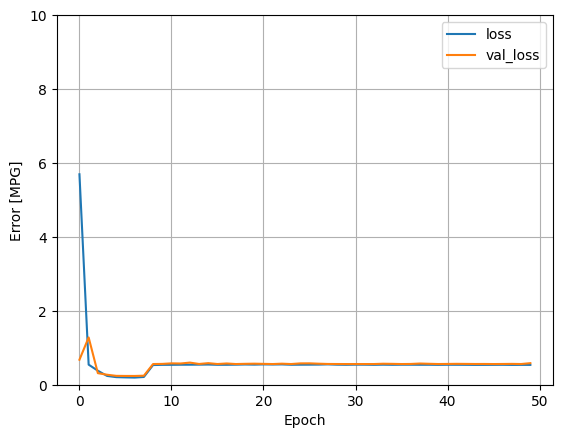

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
    
plot_loss(history)